# Leasing Data

# Leasing Data Analysis

In this worksheet we will be working with the file *LeasingData2.csv*. The purpose of the Leasing Data report is to provide information on all applicants who are current or future residents, meaning, you must have signed a lease to appear in this report. 
Therefore, using this report we can gather data such as conversion rates, rent sales, leasing velocity, and much more.

This file contains data on 13,559 resident leases.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import openpyxl

In [4]:
leasing_df = pd.read_csv("LeasingData2.csv", parse_dates=["Lease - Partially Completed","Lease - Approved","Lease - Started","Lease - Completed","Lease Start","Lease End"])
leasing_df.drop(columns=["Resident", "Email", "Phone Number"])

,Property,Unit Type,Unit Status,Gender,Lease Status,Lease Term Name,Lease Term,Lease Start,Lease End,Lease - Started,Lease - Partially Completed,Lease - Completed,Lease - Approved,Deposit Charged,Budgeted Rent,Scheduled Charges,Posted Charges
0,Sunny Villages,3x3,Notice Rented,Male,Renewal Lease Approved,08/01/2022 - 07/31/2023 (08/01/2022-07/31/2023),12,2022-08-01,2023-07-31,2022-04-12,2022-04-12,2022-04-12,2022-04-12,0.00,685.0,746.00,0
1,Sunny Villages,3x3,Notice Rented,Female,Lease Approved,08/18/2022 - 07/31/2023 (Future New Leases) (0...,12,2022-08-18,2023-07-31,2022-04-05,2022-04-12,2022-04-12,2022-04-12,0.00,680.0,746.00,0
2,Sunny Villages,3x3,Notice Rented,Male,Renewal Lease Approved,08/01/2022 - 07/31/2023 (08/01/2022-07/31/2023),12,2022-08-01,2023-07-31,2022-04-12,2022-04-14,2022-05-06,2022-05-09,0.00,680.0,756.00,0
3,Sunny Villages,3x3,Notice Rented,Female,Renewal Lease Approved,08/18/2022 - 07/31/2023 (Future New Leases) (0...,12,2022-08-01,2023-07-31,2021-11-06,2021-11-06,2021-11-06,2021-11-08,0.00,685.0,716.00,0
4,Sunny Villages,3x3,Notice Rented,Female,Lease Approved,08/18/2022 - 07/31/2023 (Future New Leases) (0...,12,2022-08-18,2023-07-31,2021-11-07,2021-11-09,2021-12-01,2021-12-01,0.00,680.0,716.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13554,Village Road,Studio F,Occupied No Notice,NaN,Lease Approved,12 months,12,2022-04-18,2023-04-17,2022-03-15,2022-03-16,2022-03-16,2022-03-16,99.00,1425.0,1327.38,"1,905.98"
13555,Village Road,Studio F,Occupied No Notice,Male,Renewal Lease Completed,12 months,12,2022-06-25,2023-06-24,2022-04-27,2022-04-29,2022-04-29,NaT,1602.56,1425.0,1230.77,0
13556,Village Road,Studio F,Vacant Rented Ready,NaN,Lease Approved,12 months,12,2022-06-07,2023-06-06,2022-05-02,2022-05-03,2022-05-03,2022-05-03,500.00,1425.0,1374.00,0
13557,Village Road,Studio F,Occupied No Notice,NaN,Lease Approved,12 months,12,2021-10-22,2022-10-21,2021-10-19,2021-10-19,2021-09-22,2021-10-20,500.00,1425.0,1205.77,"9,031.26"


In [5]:
leasing_df.head(5)

,Property,Unit Type,Unit Status,Resident,Email,Phone Number,Gender,Lease Status,Lease Term Name,Lease Term,Lease Start,Lease End,Lease - Started,Lease - Partially Completed,Lease - Completed,Lease - Approved,Deposit Charged,Budgeted Rent,Scheduled Charges,Posted Charges
0,Sunny Villages,3x3,Notice Rented,"Walker, Paul",phw@mail.usf.edu,(239) 233-2025,Male,Renewal Lease Approved,08/01/2022 - 07/31/2023 (08/01/2022-07/31/2023),12,2022-08-01,2023-07-31,2022-04-12,2022-04-12,2022-04-12,2022-04-12,0.0,685.0,746.0,0
1,Sunny Villages,3x3,Notice Rented,"Lopes de Paulo, Julia",juliamuria14@gmail.com,(813) 607-1469,Female,Lease Approved,08/18/2022 - 07/31/2023 (Future New Leases) (0...,12,2022-08-18,2023-07-31,2022-04-05,2022-04-12,2022-04-12,2022-04-12,0.0,680.0,746.0,0
2,Sunny Villages,3x3,Notice Rented,"Roock, Edward",eddieroock@gmail.com,(239) 240-3382,Male,Renewal Lease Approved,08/01/2022 - 07/31/2023 (08/01/2022-07/31/2023),12,2022-08-01,2023-07-31,2022-04-12,2022-04-14,2022-05-06,2022-05-09,0.0,680.0,756.0,0
3,Sunny Villages,3x3,Notice Rented,"Dandreano, Michkayla",mcr.raeann@icloud.com,(352) 216-9693,Female,Renewal Lease Approved,08/18/2022 - 07/31/2023 (Future New Leases) (0...,12,2022-08-01,2023-07-31,2021-11-06,2021-11-06,2021-11-06,2021-11-08,0.0,685.0,716.0,0
4,Sunny Villages,3x3,Notice Rented,"Caballero-Castro, Jennifer",jennifercaballero94@gmail.com,(813) 531-5534,Female,Lease Approved,08/18/2022 - 07/31/2023 (Future New Leases) (0...,12,2022-08-18,2023-07-31,2021-11-07,2021-11-09,2021-12-01,2021-12-01,0.0,680.0,716.0,0


In [6]:
# Print Dataframe shape (# of Rows, # of Columns)

leasing_df.shape

(13559, 20)

In [7]:
# Get complete summary of DataFrame

leasing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13559 entries, 0 to 13558
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Property                     13559 non-null  object        
 1   Unit Type                    13559 non-null  object        
 2   Unit Status                  9467 non-null   object        
 3   Resident                     13559 non-null  object        
 4   Email                        13556 non-null  object        
 5   Phone Number                 13552 non-null  object        
 6   Gender                       12764 non-null  object        
 7   Lease Status                 13559 non-null  object        
 8   Lease Term Name              13559 non-null  object        
 9   Lease Term                   13559 non-null  int64         
 10  Lease Start                  13559 non-null  datetime64[ns]
 11  Lease End                    13559 non-nu

In [8]:
# Print Number of Missing values in each column

print(leasing_df.isnull().sum())

Property                          0
Unit Type                         0
Unit Status                    4092
Resident                          0
Email                             3
Phone Number                      7
Gender                          795
Lease Status                      0
Lease Term Name                   0
Lease Term                        0
Lease Start                       0
Lease End                         0
Lease - Started                   0
Lease - Partially Completed       1
Lease - Completed               179
Lease - Approved                459
Deposit Charged                   0
Budgeted Rent                     0
Scheduled Charges                 0
Posted Charges                    0
dtype: int64


In [9]:
# Now that I have a better understanding of what the DataFrame object 'leasing_df' contains and looks like, I can begin 
# removing unwanted data and handling any cases of missing data in certain rows/columns.

leasing_df.drop(columns=["Phone Number", "Resident","Email", "Lease Start", "Lease End", "Lease Term Name", "Lease Term", "Posted Charges","Deposit Charged"], inplace=True)
leasing_df.head()

,Property,Unit Type,Unit Status,Gender,Lease Status,Lease - Started,Lease - Partially Completed,Lease - Completed,Lease - Approved,Budgeted Rent,Scheduled Charges
0,Sunny Villages,3x3,Notice Rented,Male,Renewal Lease Approved,2022-04-12,2022-04-12,2022-04-12,2022-04-12,685.0,746.0
1,Sunny Villages,3x3,Notice Rented,Female,Lease Approved,2022-04-05,2022-04-12,2022-04-12,2022-04-12,680.0,746.0
2,Sunny Villages,3x3,Notice Rented,Male,Renewal Lease Approved,2022-04-12,2022-04-14,2022-05-06,2022-05-09,680.0,756.0
3,Sunny Villages,3x3,Notice Rented,Female,Renewal Lease Approved,2021-11-06,2021-11-06,2021-11-06,2021-11-08,685.0,716.0
4,Sunny Villages,3x3,Notice Rented,Female,Lease Approved,2021-11-07,2021-11-09,2021-12-01,2021-12-01,680.0,716.0


### Replace Missing Data

Here is where we will replace any missing data in the columns ***Unit Status*** and ***Gender***.

In [10]:
# For right now, we are only going to replace the data in the following columns. We will handle the missing date values later.

leasing_df[["Unit Status","Gender"]] = leasing_df[["Unit Status","Gender"]].replace(np.nan, "No Data")

In [11]:
# Finally, let's summarize the DataFrame again so we can see the changes that have been made.

leasing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13559 entries, 0 to 13558
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Property                     13559 non-null  object        
 1   Unit Type                    13559 non-null  object        
 2   Unit Status                  13559 non-null  object        
 3   Gender                       13559 non-null  object        
 4   Lease Status                 13559 non-null  object        
 5   Lease - Started              13559 non-null  datetime64[ns]
 6   Lease - Partially Completed  13558 non-null  datetime64[ns]
 7   Lease - Completed            13380 non-null  datetime64[ns]
 8   Lease - Approved             13100 non-null  datetime64[ns]
 9   Budgeted Rent                13559 non-null  float64       
 10  Scheduled Charges            13559 non-null  float64       
dtypes: datetime64[ns](4), float64(2), object(

## Now that our dataset is formatted to fit our needs, we can begin our analysis process.
## A. Univariate analysis

In [12]:
# One of the main variables we want to analyze is Scheduled Rent.
# Scheduled Rent represents the total amount of money a resident owes for rent each month. 

leasing_df["Scheduled Charges"].describe()

Histogram plot representing the distribution of Rent Prices in the ***Scheduled Charges*** column.

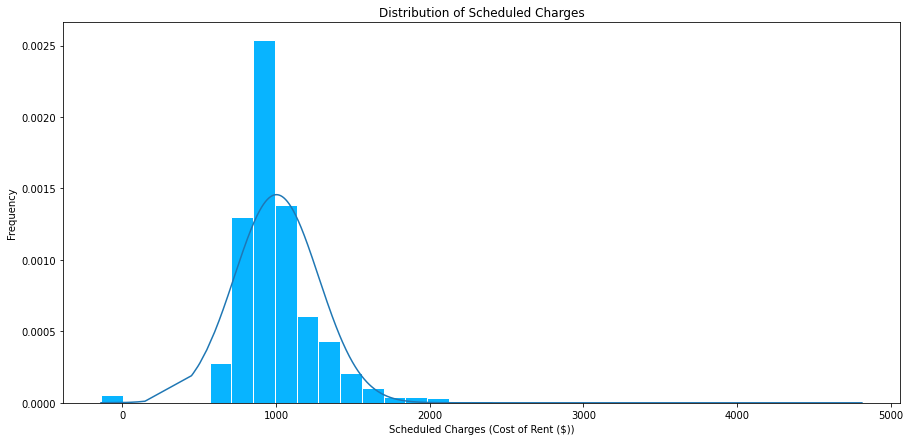

In [13]:
# Historgram and Normal Distribution

# Returns a Series object containing all of the Scheduled Charges, sorted least to greatest
sorted_charges = leasing_df["Scheduled Charges"].sort_values(ascending=True)

# Figure size.
plt.figure(figsize=(15,7))

# Add title
plt.title("Distribution of Scheduled Charges")
plt.xlabel("Scheduled Charges (Cost of Rent ($))")
plt.ylabel("Frequency")

# Plot Histogram
plt.hist(sorted_charges, color='#08b4ff', edgecolor='white', density=True, bins=35)

# Normal Distribution
mu = 0
variance = 1
sigma = math.sqrt(variance)

mean = sorted_charges.mean()
std = sorted_charges.std()

# Plot Normal Distribution
plt.plot(sorted_charges, norm.pdf(sorted_charges, mean, std))
plt.show()

In [14]:
# Pythons describe() method also can be used to provide descriptive stats on date ranges.

leasing_df["Lease - Started"].describe(datetime_is_numeric=True)

### Lease Status

In [64]:
leasing_df["Lease Status"]

In [15]:
# Variable: Lease Status
# Lets try to see how many different Lease Status' we have in this dataset.

lease_status_count = leasing_df["Lease Status"].value_counts().sort_values(ascending=False)
print(lease_status_count)

Lease Approved                       9715
Renewal Lease Approved               3370
Lease Completed                       208
Lease Partially Completed             159
Renewal Lease Partially Completed      50
Renewal Lease Completed                25
Month to Month                         18
Lease Transfer Approved                14
Name: Lease Status, dtype: int64


In [66]:
temp_status = []
for status in leasing_df["Lease Status"]:
    if "Renewal" in status:
        temp_status.append("Renewal Lease")
    elif "Month" in status:
        temp_status.append("Monthly Lease")
    else:
        temp_status.append("New Lease")

print(len(temp_status))
print(len(leasing_df["Lease Status"]))

leasing_df.insert(6, "Lease Status Type", temp_status)

13559
13559


In [67]:
leasing_df

,Property,Unit Type,Unit Status,Gender,Lease Status,Lease - Started,Lease Status Type,Lease - Partially Completed,Lease - Completed,Lease - Approved,Budgeted Rent,Scheduled Charges
0,Sunny Villages,3 Bedroom,Notice Rented,Male,Renewal Lease Approved,2022-04-12,Renewal Lease,2022-04-12,2022-04-12,2022-04-12,685.0,746.00
1,Sunny Villages,3 Bedroom,Notice Rented,Female,Lease Approved,2022-04-05,New Lease,2022-04-12,2022-04-12,2022-04-12,680.0,746.00
2,Sunny Villages,3 Bedroom,Notice Rented,Male,Renewal Lease Approved,2022-04-12,Renewal Lease,2022-04-14,2022-05-06,2022-05-09,680.0,756.00
3,Sunny Villages,3 Bedroom,Notice Rented,Female,Renewal Lease Approved,2021-11-06,Renewal Lease,2021-11-06,2021-11-06,2021-11-08,685.0,716.00
4,Sunny Villages,3 Bedroom,Notice Rented,Female,Lease Approved,2021-11-07,New Lease,2021-11-09,2021-12-01,2021-12-01,680.0,716.00
...,...,...,...,...,...,...,...,...,...,...,...,...
13554,Village Road,Studio,Occupied No Notice,No Data,Lease Approved,2022-03-15,New Lease,2022-03-16,2022-03-16,2022-03-16,1425.0,1327.38
13555,Village Road,Studio,Occupied No Notice,Male,Renewal Lease Completed,2022-04-27,Renewal Lease,2022-04-29,2022-04-29,NaT,1425.0,1230.77
13556,Village Road,Studio,Vacant Rented Ready,No Data,Lease Approved,2022-05-02,New Lease,2022-05-03,2022-05-03,2022-05-03,1425.0,1374.00
13557,Village Road,Studio,Occupied No Notice,No Data,Lease Approved,2021-10-19,New Lease,2021-10-19,2021-09-22,2021-10-20,1425.0,1205.77


### Property

In [16]:
# Variable: PROPERTY
# Count number of occurences per property in column 'Property'.

property_count = leasing_df["Property"].value_counts().sort_values(ascending=False)

### Unit Type

In [63]:
# Variable: UNIT TYPE
# Get the number of Unit Types in the dataset.

print("Unique Unit Types: " + str(leasing_df["Unit Type"].nunique()))

Unique Unit Types: 9
0        3 Bedroom
1        3 Bedroom
2        3 Bedroom
3        3 Bedroom
4        3 Bedroom
           ...    
13554       Studio
13555       Studio
13556       Studio
13557       Studio
13558       Studio
Name: Unit Type, Length: 13559, dtype: object


In [18]:
# We only want to know if a Unit is a 1, 2, 3, 4, 5 Bed, or Studio Apartment, we are not concerned about the number of Bathrooms
# We can achieve this by extracting the first element of each value in the column, because we know that an apartment with 4 bedrooms, and 3 bathrooms
# will be displayed as 4x3 in the column. 

unit_list = []
unit_dict = {}
nums = ['1', '2', '3', '4', '5', '6']
count = 0
for unit in leasing_df["Unit Type"]:
    # First character of Unit Type value
    val = str(unit[0]).lower()
    if val == 's':
        val = 'Studio'

    if val == 'm':
        val = 'Murphy'
    
    if val in nums:
        pos = nums.index(val)
        val = str(nums[pos]+" Bedroom")
        
    # This can represent multiple different options so we have to loop another level to extract the number of beds.
    if str(unit[0]).lower() == 'n':
        temp = unit.rsplit(" ")
        if  len(temp) > 2:
            val = temp[2][0]
            if val in nums:
                pos = nums.index(val)
                val = str(nums[pos]+" Bedroom")
        else:
            pass
    unit_list.append(val)
    count += 1

In [19]:
# Now we can replace that column of data with the list we just created. 

leasing_df.iloc[:, 1] = unit_list
print(leasing_df["Unit Type"])

0        3 Bedroom
1        3 Bedroom
2        3 Bedroom
3        3 Bedroom
4        3 Bedroom
           ...    
13554       Studio
13555       Studio
13556       Studio
13557       Studio
13558       Studio
Name: Unit Type, Length: 13559, dtype: object


In [20]:
# Variable: UNIT TYPE
# Count number of occurences per property in column UNIT TYPE

unit_count_all = leasing_df["Unit Type"].value_counts().sort_values(ascending=False)
print(unit_count_all)

4 Bedroom    5990
2 Bedroom    3568
3 Bedroom    1485
1 Bedroom     885
Studio        796
5 Bedroom     391
Murphy        306
6 Bedroom     137
n               1
Name: Unit Type, dtype: int64


### Gender

In [21]:
# Variable: GENDER
# Count number of occurences per property in column UNIT TYPE

gender_count = leasing_df["Gender"].value_counts()[:2].sort_values(ascending=False)
print(gender_count)

Female    7622
Male      5142
Name: Gender, dtype: int64


In [22]:
# Variable: LEASE - STARTED
# Find which months saw the highest leasing velocity.

lease_start_months = leasing_df["Lease - Started"].dt.to_period('M')
print(lease_start_months.value_counts().sort_values(ascending=False))

2021-10    2281
2021-11    2212
2021-09    1778
2022-03    1515
2022-02    1485
2022-04    1217
2021-12    1090
2022-01    1050
2022-05     876
2021-08      40
2021-07       8
2021-06       5
2021-03       2
Freq: M, Name: Lease - Started, dtype: int64


## B. Bivariate Analysis

### 1. Analyze Scheduled Charges

In [23]:
# Now we are going to assess multiple variables together in order to find any trends or correlations
# We'll begin by grouping the data according to LEASE STATUS, and only if Lease Status is Lease Approved, or 
# Renewal Lease Approved

status = ["Lease Approved", "Renewal Lease Approved"]
new_vs_renewal = leasing_df[leasing_df["Lease Status"].isin(status)].copy()

# Output the new Dataframe so we can see that only Renewal Lease Approved and Lease Approved appear. 

new_vs_renewal.head(10)

,Property,Unit Type,Unit Status,Gender,Lease Status,Lease - Started,Lease - Partially Completed,Lease - Completed,Lease - Approved,Budgeted Rent,Scheduled Charges
0,Sunny Villages,3 Bedroom,Notice Rented,Male,Renewal Lease Approved,2022-04-12,2022-04-12,2022-04-12,2022-04-12,685.0,746.0
1,Sunny Villages,3 Bedroom,Notice Rented,Female,Lease Approved,2022-04-05,2022-04-12,2022-04-12,2022-04-12,680.0,746.0
2,Sunny Villages,3 Bedroom,Notice Rented,Male,Renewal Lease Approved,2022-04-12,2022-04-14,2022-05-06,2022-05-09,680.0,756.0
3,Sunny Villages,3 Bedroom,Notice Rented,Female,Renewal Lease Approved,2021-11-06,2021-11-06,2021-11-06,2021-11-08,685.0,716.0
4,Sunny Villages,3 Bedroom,Notice Rented,Female,Lease Approved,2021-11-07,2021-11-09,2021-12-01,2021-12-01,680.0,716.0
5,Sunny Villages,3 Bedroom,Notice Rented,Female,Lease Approved,2022-04-18,2022-04-18,2022-04-19,2022-04-19,680.0,766.0
6,Sunny Villages,3 Bedroom,Notice Rented,Male,Lease Approved,2022-03-27,2022-03-27,2022-03-27,2022-03-28,685.0,736.0
7,Sunny Villages,3 Bedroom,Notice Rented,Male,Lease Approved,2022-03-29,2022-03-29,2022-03-29,2022-03-30,680.0,736.0
8,Sunny Villages,3 Bedroom,Notice Rented,Male,Lease Approved,2022-03-29,2022-03-30,2022-03-30,2022-03-31,680.0,756.0
9,Sunny Villages,3 Bedroom,Notice Rented,Female,Renewal Lease Approved,2022-04-15,2022-04-15,2022-04-17,2022-04-18,685.0,771.0


### Scheduled Charges by Lease Status

In [24]:
# Compare the total rent prices of residents who renew, vs residents who sign new leases

compare_rent_by_status = new_vs_renewal[["Lease Status", "Unit Type", "Scheduled Charges"]].groupby(by="Lease Status", as_index=False).sum()
print(compare_rent_by_status)

             Lease Status  Scheduled Charges
0          Lease Approved         9808558.19
1  Renewal Lease Approved         3291025.98


### Scheduled Charges grouped by Lease Status and Unit Type

In [25]:
# Do the same thing as above, but this time add Unit Type to the grouping

compare_rent_status_unit = new_vs_renewal[["Lease Status", "Unit Type", "Scheduled Charges", "Gender"]].groupby(by=["Lease Status","Unit Type"], as_index=False).sum()
print(compare_rent_status_unit)

              Lease Status  Unit Type  Scheduled Charges
0           Lease Approved  1 Bedroom          760086.22
1           Lease Approved  2 Bedroom         2440692.34
2           Lease Approved  3 Bedroom         1036505.00
3           Lease Approved  4 Bedroom         4167574.01
4           Lease Approved  5 Bedroom          328461.00
5           Lease Approved  6 Bedroom          112286.00
6           Lease Approved     Murphy          249944.48
7           Lease Approved     Studio          713009.14
8   Renewal Lease Approved  1 Bedroom          209669.17
9   Renewal Lease Approved  2 Bedroom          987022.92
10  Renewal Lease Approved  3 Bedroom          344217.48
11  Renewal Lease Approved  4 Bedroom         1253074.00
12  Renewal Lease Approved  5 Bedroom           55417.00
13  Renewal Lease Approved  6 Bedroom           30534.00
14  Renewal Lease Approved     Murphy           95983.02
15  Renewal Lease Approved     Studio          315108.39


In [26]:
from lets_plot import * 
ggplot() + \
geom_bar(aes(x="Lease Status", y="Scheduled Charges", color="Unit Type", fill="Unit Type"), data=compare_rent_status_unit, sampling="none" if compare_rent_status_unit.size < 50 else sampling_pick(n=50), stat="identity") + \
ggtitle("New Leases vs Renewal Leases")  + \
ggsize(700, 500)

### Average Scheduled Charges by Unit Type

In [27]:
# Find the Mean rent price for each different Unit Type

compare_avg_unit_rent = new_vs_renewal[["Lease Status", "Unit Type", "Scheduled Charges","Gender"]].groupby(by=["Unit Type"], as_index=False).mean()
print(compare_avg_unit_rent)

   Unit Type  Scheduled Charges
0  1 Bedroom        1138.210552
1  2 Bedroom         989.525191
2  3 Bedroom         962.175944
3  4 Bedroom         936.370359
4  5 Bedroom        1023.674667
5  6 Bedroom        1050.147059
6     Murphy        1235.455357
7     Studio        1363.551101


In [28]:
from lets_plot import * 
ggplot() + \
geom_bar(aes(x="Unit Type", y="Scheduled Charges", color="Unit Type", fill="Unit Type"), data=compare_avg_unit_rent, sampling="none" if compare_avg_unit_rent.size < 50 else sampling_pick(n=50), stat="identity") + \
ggtitle("Scheduled Charges according to Unit Type")  + \
ggsize(700, 500)

### Average Scheduled Charges by Gender and Lease Status

In [29]:
# Find the MEAN rent price for each different Unit Type

compare_gender_status = new_vs_renewal[["Lease Status", "Unit Type", "Scheduled Charges","Gender"]].groupby(by=["Gender", "Lease Status"], as_index=False).mean()
compare_gender_status

,Gender,Lease Status,Scheduled Charges
0,Female,Lease Approved,1006.679422
1,Female,Renewal Lease Approved,997.040569
2,Male,Lease Approved,1009.832478
3,Male,Renewal Lease Approved,1015.936727
4,No Data,Lease Approved,1074.310648
5,No Data,Renewal Lease Approved,820.446965


In [30]:
from lets_plot import * 
ggplot() + \
geom_bar(aes(x="Gender", y="Scheduled Charges", color="Lease Status", fill="Lease Status"), data=compare_gender_status, sampling="none" if compare_gender_status.size < 50 else sampling_pick(n=50), stat="identity") + \
ggtitle("Rent Charges according to Gender - grouped by Lease Status")  + \
ggsize(700, 500)

## C. Time Series Analysis

sorted_df: A DataFrame copy without any missing data in the date columns

In [31]:
# This is where we'll be anaylzing the date columns in our DataFrame. This is where we'll drop any missing dataframe rows
# that don't contain a 'Lease - Approved' date. We can drop the other date rows entirely, 
# because we aren't concerned about those dates.

drop_missing = leasing_df.dropna()

# First, sort DataFrame leasing_df in chronological order, according to Lease - Start date.

sorted_df = drop_missing.sort_values(by="Lease - Started")

# Next, we're going to set the column Lease - Started date to be the index.
months_index = sorted_df["Lease - Started"].dt.to_period("M")
sorted_df.set_index(months_index, inplace=True)
sorted_df["Start Month"] = [n for n in months_index]
# Finally, let's roemove any outliers in the data. 
sorted_df = sorted_df[sorted_df["Scheduled Charges"] <= 1800]

sorted_df

,Property,Unit Type,Unit Status,Gender,Lease Status,Lease - Started,Lease - Partially Completed,Lease - Completed,Lease - Approved,Budgeted Rent,Scheduled Charges,Start Month
Lease - Started,,,,,,,,,,,,
2021-03,Village Road,1 Bedroom,Occupied No Notice,Male,Renewal Lease Approved,2021-03-18,2021-04-08,2021-04-08,2021-04-08,1704.00,1478.85,2021-03
2021-06,Village Road,Studio,Occupied No Notice,Male,Lease Approved,2021-06-04,2021-06-05,2021-06-05,2021-06-07,1309.00,1272.16,2021-06
2021-06,Village Road,Studio,Occupied No Notice,Male,Lease Approved,2021-06-15,2021-06-15,2021-06-15,2021-06-15,1340.00,1158.85,2021-06
2021-06,Village Road,Studio,Occupied No Notice,Female,Lease Approved,2021-06-29,2021-06-30,2021-07-05,2021-07-06,1309.00,1161.39,2021-06
2021-06,Village Road,Murphy,Occupied No Notice,Male,Lease Approved,2021-06-29,2021-06-29,2021-06-29,2021-06-29,1209.00,1097.20,2021-06
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05,University Side,5 Bedroom,Notice Rented,Male,Lease Approved,2022-05-26,2022-01-24,2022-03-24,2022-05-27,955.00,991.00,2022-05
2022-05,Campus Housing,4 Bedroom,Vacant Rented Ready,Male,Lease Approved,2022-05-26,2022-03-24,2022-05-03,2022-05-26,0.00,1082.00,2022-05
2022-05,University Hill,3 Bedroom,Occupied No Notice,No Data,Renewal Lease Approved,2022-05-26,2022-05-26,2022-05-26,2022-05-26,592.41,615.00,2022-05


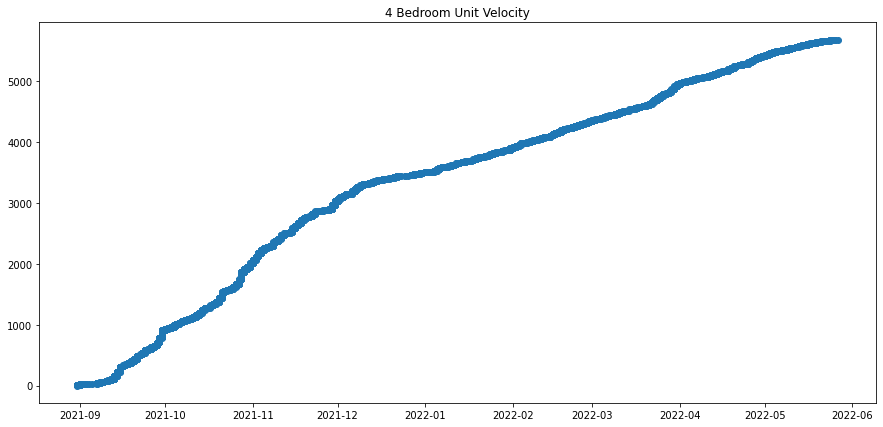

In [32]:
# Since 4 Bedroom units are our most popular, lets only visualize the leasing velocity of that Unit Type
beds4 = sorted_df[sorted_df["Unit Type"] == "4 Bedroom"]

# Used for X-Axis
dates = beds4["Lease - Started"].to_list()

# Y-Axis
count = [n for n in range(0, len(dates))]

plt.figure(figsize=(15,7))
plt.title("4 Bedroom Unit Velocity")

# Plot Data
plt.scatter(dates, count, linewidths=1)

plt.show()

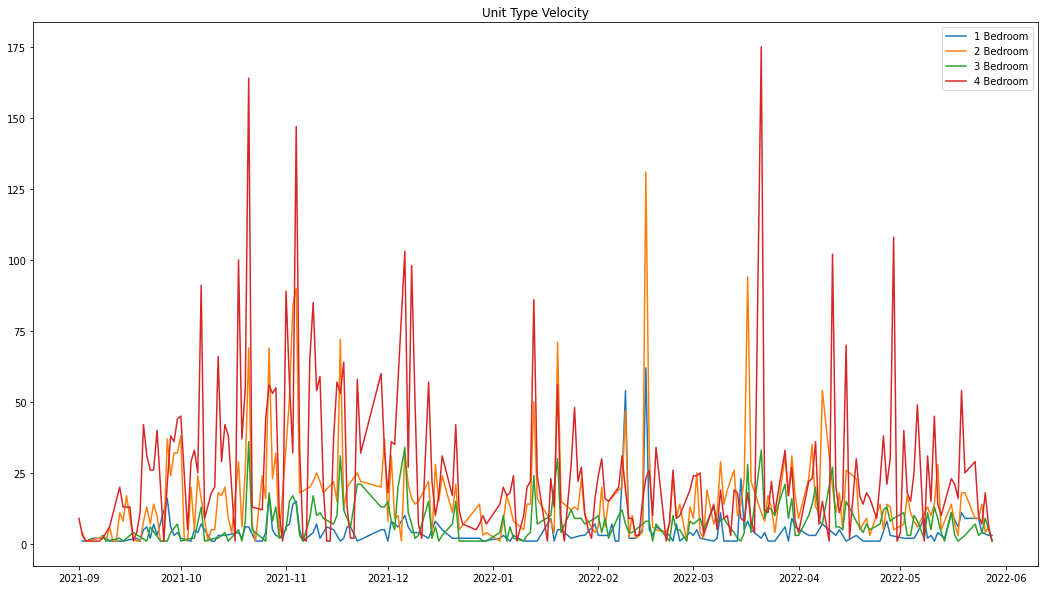

In [33]:
# Plot the Leasing velocity of each Unit Type

unit_types = list(set(leasing_df["Unit Type"].to_list()))

unit_types = sorted(unit_types)

# Drop unwanted key
unit_types = unit_types[:-5]

#Declare figure size
plt.figure(figsize=(18,10))

# Get rid of any early outlier dates that may have occured prior to the true start of leasing which was September 2021
temp = sorted_df[sorted_df["Lease - Approved"] >= datetime(2021, 9, 1)]

# Loop through the list of 7 different Unit Types and plot each
for unit in unit_types:
    beds = temp[temp["Unit Type"] == unit]
    date_count = beds["Lease - Approved"].value_counts().sort_index(ascending=True)
    dates = [i for i in date_count.index]
    count = date_count.values
    plt.plot(dates, count)

plt.legend(unit_types)
plt.title("Unit Type Velocity")
plt.show()

## Create new Dataframe with Metrics according to Unit Types

In [34]:
# Create temp list of Unit Types
unit_type_list = ['5 Bedroom', '4 Bedroom', 'Murphy', '6 Bedroom', 'Studio', '3 Bedroom', '1 Bedroom', '2 Bedroom']

units_df2 = sorted_df.groupby("Unit Type").aggregate({'Unit Type':'count', 'Scheduled Charges':['sum', 'mean']})

units_df = leasing_df[leasing_df["Unit Type"].isin(unit_type_list)]

total_count = units_df["Unit Type"].value_counts().sort_index()

units_df2

Unit Type 
 Scheduled Charges 
 
 
 
 count 
 sum 
 mean 
 
 
 Unit Type 
 
 
 
 
 
 
 
 1 Bedroom 
 817 
 901531.47 
 1103.465692 
 
 
 2 Bedroom 
 3417 
 3321541.45 
 972.063638 
 
 
 3 Bedroom 
 1429 
 1365865.48 
 955.819090 
 
 
 4 Bedroom 
 5680 
 5195930.01 
 914.776410 
 
 
 5 Bedroom 
 365 
 364904.00 
 999.736986 
 
 
 6 Bedroom 
 136 
 142820.00 
 1050.147059 
 
 
 Murphy 
 282 
 348092.30 
 1234.369858 
 
 
 Studio 
 747 
 1011519.69 
 1354.109357

In [35]:
# Output DataFrame to an Excel spreadsheet for Download
leasing_df.to_excel("Reformatted Pre-Lease.xlsx")

# Resident Data

# Resident Data Analysis
The file, *ResidentData2.csv* contains historical data on all individuals who opened up a Guest Card with any of 39 total properties
in the portfolio. The main difference between this dataset, and the dataset we worked with in the previous sheet, *LeasingData2.csv*, is that *LeasingData2.csv*
only contains information on residents who go on to start a Lease. Where as *ResidentData2.csv* contains info on ALL individuals who 
are entered into the company CRM.

After reading in the file and dropping a few initial columns, the dataset contains 94,758 rows and 21 columns of data.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.stats import norm
import openpyxl
import random
import calendar

In [37]:
res_df = pd.read_csv("ResidentData2.csv",parse_dates=["New Lead Created On","Application Started","Application Completed",
                     "Application Approved","Lease Started","Lease Completed","Lease Approved"], 
                     dtype={"Specials":"string", "Close Reason (Lead)": "string", "Primary Address - Postal Code":"string"})
res_df.drop(columns=["Name","Year Of Study","Current Lease Start","Application ID", "Lease ID", "Specials", "Close Reason (Lead)", "Primary Phone", "E-mail", "Move-In Date", "Move-Out Date",
                     "License State", "Application Completed", "Lease Completed", "Renewal Lease Start", "Renewal Lease End", "Area Of Study"], inplace=True)

res_df.head(5)

,Property,New Lead Created On,Application Started,Application Approved,Lease Started,Lease Approved,Leasing Agent (Assigned),Lead Source,First Visit/Tour Date,Application Status,...,Status,Scheduled Rent,Bldg-Unit,Unit Type,Age,Gender,Birth Date,Primary Address - City,Primary Address - STATE/PROVINCE,Primary Address - Postal Code
0,Sunny Villages,2022-01-19,2022-01-19,2022-01-19,2022-01-19,2022-01-19,"Freeman, Lance",Unknown,NaN,Lease Approved,...,Current,690,3-101-A,4x4,NaN,NaN,NaN,TAMPA,FL,33613
1,Sunny Villages,2022-01-19,2022-01-19,2022-01-19,2022-01-19,2022-01-19,"Freeman, Lance",Unknown,NaN,Lease Approved,...,Current,690,3-101-B,4x4,NaN,NaN,NaN,TAMPA,FL,33613
2,Sunny Villages,2022-01-19,2022-01-19,2022-01-19,2022-01-19,2022-01-19,"Freeman, Lance",Unknown,NaN,Lease Approved,...,Current,690,3-101-C,4x4,NaN,NaN,NaN,TAMPA,FL,33613
3,Sunny Villages,2022-01-19,2022-01-19,2022-01-19,2022-01-19,2022-01-19,"Freeman, Lance",Unknown,NaN,Lease Approved,...,Current,690,3-101-D,4x4,NaN,NaN,NaN,TAMPA,FL,33613
4,Sunny Villages,2022-03-30,2022-04-27,NaT,NaT,NaT,"McElhaney, Maggie",Other,3/30/22,Application Archived,...,Applicant,NaN,NaN,NaN,NaN,NaN,NaN,Tampa,FL,33613


In [38]:
# Get number of rows and columns

res_df.shape

(94758, 21)

In [39]:
# Modify dtypes for specified columns

res_df[["Status", "Application Status","Bldg-Unit", "Unit Type", "First Visit/Tour Date"]] = res_df[["Status", 
                                        "Application Status","Bldg-Unit", "Unit Type", "First Visit/Tour Date"]].astype("string")

In [40]:
# info() prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94758 entries, 0 to 94757
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Property                          94758 non-null  object        
 1   New Lead Created On               94758 non-null  datetime64[ns]
 2   Application Started               61995 non-null  datetime64[ns]
 3   Application Approved              42979 non-null  datetime64[ns]
 4   Lease Started                     39656 non-null  datetime64[ns]
 5   Lease Approved                    37767 non-null  datetime64[ns]
 6   Leasing Agent (Assigned)          74946 non-null  object        
 7   Lead Source                       88541 non-null  object        
 8   First Visit/Tour Date             19156 non-null  string        
 9   Application Status                94758 non-null  string        
 10  Occupant Type                     94758 non-nu

In [41]:
# Print number of missing values in each column

print(res_df.isnull().sum())

Property                                0
New Lead Created On                     0
Application Started                 32763
Application Approved                51779
Lease Started                       55102
Lease Approved                      56991
Leasing Agent (Assigned)            19812
Lead Source                          6217
First Visit/Tour Date               75602
Application Status                      0
Occupant Type                           0
Status                              29181
Scheduled Rent                      76386
Bldg-Unit                           54306
Unit Type                           54776
Age                                 36398
Gender                              43817
Birth Date                          36398
Primary Address - City              29196
Primary Address - STATE/PROVINCE    29179
Primary Address - Postal Code       30700
dtype: int64


In [42]:
# Replace missing values in columns of type 'String'
res_df[["Lead Source","Bldg-Unit", "Leasing Agent (Assigned)", "Gender", "Unit Type", "Status"]] = res_df[["Lead Source", "Bldg-Unit",
                                            "Leasing Agent (Assigned)", "Gender", "Unit Type", "Status"]].replace(np.nan, "Missing")

res_df["First Visit/Tour Date"] = res_df["First Visit/Tour Date"].replace(np.nan, "No Tour")

res_df[["Age", "Scheduled Rent"]] = res_df[["Age", "Scheduled Rent"]].replace(np.nan, 0)

In [43]:
print(res_df.isnull().sum())

Property                                0
New Lead Created On                     0
Application Started                 32763
Application Approved                51779
Lease Started                       55102
Lease Approved                      56991
Leasing Agent (Assigned)                0
Lead Source                             0
First Visit/Tour Date                   0
Application Status                      0
Occupant Type                           0
Status                                  0
Scheduled Rent                          0
Bldg-Unit                               0
Unit Type                               0
Age                                     0
Gender                                  0
Birth Date                          36398
Primary Address - City              29196
Primary Address - STATE/PROVINCE    29179
Primary Address - Postal Code       30700
dtype: int64


In [44]:
# In the student-housing industry, the leasing season takes places during the same months that a typical American 
# college/university holds classes. Due to this, we only want to analyze data between September 2021 and May 2022 (Inclusive)

ay_21_22 = res_df[res_df["New Lead Created On"] >= datetime(2021, 8, 1)].copy()

ay_21_22.shape

(55729, 21)

### This is where we will begin creating a new Dataframe with information and data 
### that we will produce from the provided dataset.

In [45]:
# First, I will use the value_counts() built-in Python function to get the total number of times each property name appears in our
# dataset. 
rank_properties = ay_21_22["Property"].value_counts().sort_values(ascending=False)

# Number of Properties
print("Unique Property Names: " + str(len(rank_properties.index)))

Unique Property Names: 39


In [46]:
# Initialize empty dataFrame and add data to columns.

# Create a list of property names to use for the new dataframe column. 
prop_names = [i for i in rank_properties.index]

# Initalize empty DF
df = pd.DataFrame(columns=["Property", "Total New Leads"])

# Add data to empty columns
df["Property"] = prop_names
df["Total New Leads"] = rank_properties.values

df

,Property,Total New Leads
0,University Crossings,3364
1,Campus Housing,2873
2,Park Road,2797
3,Palmer Side,2501
4,Village Place,2269
5,University Place,2051
6,Park Villages,2032
7,Palmer Apartments,2022
8,Village Road,1934
9,Sunny Crossings,1901


## Visualize top 10 Properties according to total new leads generated.

In [47]:
from lets_plot import * 
ggplot() + \
geom_bar(aes(x="Property", y="Total New Leads", color="Total New Leads", fill="Total New Leads"), data=df, sampling="none" if df.size < 50 else sampling_pick(n=50), stat="identity") + \
ggtitle("New Leads by Property")  + \
ggsize(1000, 600)

In [48]:
# Find the number of leads per month according to property
ay_21_22["Lead Created Month"] = [m.month for m in ay_21_22["New Lead Created On"]]
# Convert numerical month value into full Month name.
ay_21_22["Lead Created Month"] = ay_21_22["Lead Created Month"].apply(lambda x: calendar.month_abbr[x])

ay_21_22

,Property,New Lead Created On,Application Started,Application Approved,Lease Started,Lease Approved,Leasing Agent (Assigned),Lead Source,First Visit/Tour Date,Application Status,...,Scheduled Rent,Bldg-Unit,Unit Type,Age,Gender,Birth Date,Primary Address - City,Primary Address - STATE/PROVINCE,Primary Address - Postal Code,Lead Created Month
0,Sunny Villages,2022-01-19,2022-01-19,2022-01-19,2022-01-19,2022-01-19,"Freeman, Lance",Unknown,No Tour,Lease Approved,...,690,3-101-A,4x4,0.0,Missing,NaN,TAMPA,FL,33613,Jan
1,Sunny Villages,2022-01-19,2022-01-19,2022-01-19,2022-01-19,2022-01-19,"Freeman, Lance",Unknown,No Tour,Lease Approved,...,690,3-101-B,4x4,0.0,Missing,NaN,TAMPA,FL,33613,Jan
2,Sunny Villages,2022-01-19,2022-01-19,2022-01-19,2022-01-19,2022-01-19,"Freeman, Lance",Unknown,No Tour,Lease Approved,...,690,3-101-C,4x4,0.0,Missing,NaN,TAMPA,FL,33613,Jan
3,Sunny Villages,2022-01-19,2022-01-19,2022-01-19,2022-01-19,2022-01-19,"Freeman, Lance",Unknown,No Tour,Lease Approved,...,690,3-101-D,4x4,0.0,Missing,NaN,TAMPA,FL,33613,Jan
4,Sunny Villages,2022-03-30,2022-04-27,NaT,NaT,NaT,"McElhaney, Maggie",Other,3/30/22,Application Archived,...,0,Missing,Missing,0.0,Missing,NaN,Tampa,FL,33613,Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94753,University Road,2022-02-14,2022-02-23,2022-02-28,2022-02-28,2022-03-22,Missing,Internet,No Tour,Lease Approved,...,0,2909-203-A,ula2,20.0,F,9/24/01,TAMPA,FL,33613,Feb
94754,University Road,2022-05-24,2022-05-24,2022-05-24,2022-05-24,2022-06-01,"Hernandez, Natashya",Walk/Drive By,No Tour,Lease Approved,...,0,2909-203-B,ula2,24.0,Missing,1/1/98,TAMPA,FL,33613,May
94755,University Road,2022-05-03,2022-05-03,NaT,NaT,NaT,"Hernandez, Natashya",Internet,No Tour,Application Archived,...,0,Missing,Missing,20.0,F,12/10/01,Tampa,FL,33613,May
94756,University Road,2021-12-15,2022-03-10,2022-03-10,2022-03-10,2022-03-14,Missing,Internet,No Tour,Lease Approved,...,0,2947-202,ula1,26.0,F,10/10/95,TAMPA,FL,33613,Dec


### Visualize number of new leads according to Month. 

In [49]:
from lets_plot import * 
ggplot() + \
geom_bar(aes(x="Lead Created Month", y="..count.."), data=ay_21_22, sampling="none" if ay_21_22.size < 50 else sampling_pick(n=50), color="#b5b1ec", fill="#b5b1ec") + \
ggtitle("New Leads by Month")  + \
ggsize(900, 500)

In [50]:
# Next, we'll use the same data we used to produce the chart below, to create a new DataFrame column with the average number of 
# leads per month, by property.

# Create dictionary to track average number of leads per month by property
avg_lis = []

# Create a list containing the average number of leads per month for each property.
add_to_df = []
for name in df["Property"]:
    # Create temporary dataframe with only the data for the current property name
    temp = ay_21_22[ay_21_22["Property"] == name]
    count = temp["Lead Created Month"].value_counts().values.mean()
    # Average leads per month
    avg_lis.append((int(round(count, 0))))
    # Sort the dates in Chronological order
    temp_dates = [d for d in temp["New Lead Created On"].sort_values(ascending=True)]
    # List for collecting number of days between leads. 
    avg_days = []
    # Loop through all of the dates, finding time between the current iteration and the next. Then find the average. 
    for i in range(0, len(temp_dates) - 1):
        d2 = temp_dates[i + 1]
        d1 = temp_dates[i]
        n_days = d2 - d1
        avg_days.append(n_days.days)
    # Get average time between leads
    add_to_df.append(round((sum(avg_days) / len(avg_days)), 2))

# pre_lease_data = 
# Add data to new DF column
df["Leads Per Month"] = avg_lis
df["Avg Days between Leads"] = add_to_df

df   

,Property,Total New Leads,Leads Per Month,Avg Days between Leads
0,University Crossings,3364,306,0.09
1,Campus Housing,2873,261,0.11
2,Park Road,2797,254,0.12
3,Palmer Side,2501,227,0.12
4,Village Place,2269,206,0.15
5,University Place,2051,186,0.16
6,Park Villages,2032,185,0.16
7,Palmer Apartments,2022,184,0.16
8,Village Road,1934,176,0.17
9,Sunny Crossings,1901,173,0.17


In [51]:
# Calculate total time between when a lead was created, and when their lease was approved.

# Loop through property names
add_to_df = []
for name in df["Property"]:
    temp_df = ay_21_22[ay_21_22["Property"] == name].copy()
    temp_df = temp_df.dropna(subset=["Lease Approved"])
    lead_to_lease = temp_df["Lease Approved"] - temp_df["New Lead Created On"]
    d_lis = [d.days for d in lead_to_lease]
    time_btween = round(sum(d_lis) / len(d_lis), 0)
    add_to_df.append(time_btween)

df["Avg Days till Lease Signed"] = add_to_df
df

,Property,Total New Leads,Leads Per Month,Avg Days between Leads,Avg Days till Lease Signed
0,University Crossings,3364,306,0.09,30.0
1,Campus Housing,2873,261,0.11,16.0
2,Park Road,2797,254,0.12,33.0
3,Palmer Side,2501,227,0.12,15.0
4,Village Place,2269,206,0.15,68.0
5,University Place,2051,186,0.16,65.0
6,Park Villages,2032,185,0.16,16.0
7,Palmer Apartments,2022,184,0.16,22.0
8,Village Road,1934,176,0.17,18.0
9,Sunny Crossings,1901,173,0.17,30.0


In [52]:
leases = leasing_df.dropna(subset=["Lease - Partially Completed"])
pre = set(leases["Property"])
# print(leases)
print(len(pre))

31


In [53]:
df = df[df["Property"].isin(pre)]
props_df = set(df["Property"])
leases = leases[leases["Property"].isin(props_df)]
count_leases = leases["Property"].value_counts().sort_index(ascending=True)
lease_status_count = list(count_leases.values)

In [54]:
# Use Groupby() method to analyze application status.
# Create a list of all property names sorted alphabetically.
ay_21_22_temp = ay_21_22.sort_values(by="Property", ascending=True)

df = df.sort_values(by="Property", ascending=True)

# Sort by Property name to assure we add the correct key, value pairings in the new dataframe. 
# df = df.sort_values(by="Property", ascending=True).reset_index(drop=True)
df.insert(3, "Lease Conversions", lease_status_count)

df

,Property,Total New Leads,Leads Per Month,Lease Conversions,Avg Days between Leads,Avg Days till Lease Signed
35,Campus Crossings,492,49,239,0.58,12.0
1,Campus Housing,2873,261,1305,0.11,16.0
7,Palmer Apartments,2022,184,554,0.16,22.0
26,Palmer Crossings,1088,99,189,0.30,32.0
36,Palmer Hill,372,34,28,0.89,42.0
3,Palmer Side,2501,227,808,0.12,15.0
16,Park Apartments,1539,140,449,0.21,25.0
10,Park Crossings,1742,158,608,0.19,30.0
21,Park Housing,1330,121,453,0.25,20.0
18,Park Place,1489,135,473,0.22,25.0


In [55]:
# Add Average number of leases started per month.
avg_lis = []
# List for storing values
l3 = []
l4 = []
for name in df["Property"]:
    # Create temporary dataframe with only the data for the current property name
    temp = ay_21_22[ay_21_22["Property"] == name].copy()
    # Drop any missing dates
    temp.dropna(subset=["Lease Started"], inplace=True)
    temp["Lease Month"] = [m.month for m in temp["Lease Started"]]
    temp["Lease Month"] = temp["Lease Month"].apply(lambda x: calendar.month_abbr[x])
    count = temp["Lease Month"].value_counts().values.mean()
    top_month = temp["Lease Month"].value_counts().sort_values(ascending=False)
    l3.append(top_month.index[0])
    l4.append(top_month.index[-1])
    # Average leases per month
    avg_lis.append((int(round(count, 0))))

df["Leases Started Per Month"] = avg_lis
df["Maximum Lease Starts"] = l3
df["Minimum Lease Starts"] = l4

df

,Property,Total New Leads,Leads Per Month,Lease Conversions,Avg Days between Leads,Avg Days till Lease Signed,Leases Started Per Month,Maximum Lease Starts,Minimum Lease Starts
35,Campus Crossings,492,49,239,0.58,12.0,27,Nov,Sep
1,Campus Housing,2873,261,1305,0.11,16.0,110,Oct,Jun
7,Palmer Apartments,2022,184,554,0.16,22.0,55,Nov,Jun
26,Palmer Crossings,1088,99,189,0.30,32.0,19,Jan,Sep
36,Palmer Hill,372,34,28,0.89,42.0,4,May,Aug
3,Palmer Side,2501,227,808,0.12,15.0,87,Mar,May
16,Park Apartments,1539,140,449,0.21,25.0,40,Jan,Aug
10,Park Crossings,1742,158,608,0.19,30.0,60,Dec,Sep
21,Park Housing,1330,121,453,0.25,20.0,47,Nov,Aug
18,Park Place,1489,135,473,0.22,25.0,45,Oct,Aug


In [56]:
conversion_rate = (round((df["Lease Conversions"] / df["Total New Leads"]) *100, 1))
df["Conversion Rate %"] = conversion_rate

ay_21_22.to_csv("Reformatted Resident Data.csv")
df.to_csv("Property Metrics.csv")

In [57]:
from lets_plot import * 
ggplot()
from lets_plot.bistro import corr
corr.corr_plot(df).points().build() + ggsize(500, 370) + \
ggtitle("Correlation Plot")  + \
ggsize(700, 500)

# Encryption

## This sheet is used to modify the names of the properties in each file in order to maintain confidentiality. 

In [2]:
import pandas as pd
import numpy as np
import openpyxl
import random

In [3]:
resData = pd.read_csv("Resident Data.csv",parse_dates=["New Lead Created On","Application Started","Application Completed",
                     "Application Approved","Lease Started","Lease Completed","Lease Approved"], 
                     dtype={"Specials":"string", "Close Reason (Lead)": "string", "Primary Address - Postal Code":"string"})
preLease = pd.read_csv("Leasing Data.csv")

In [4]:
# For privacy purposes, I will replace each Property name with a new randomly generated name. 
l1 = ["Sunny", "Park", "Palmer", "Campus", "Village", "University"]
l2 = ["Hill", "Side", "Housing", "Place", "Villages", "Crossings", "Road", "Housing", "Apartments"]

# Get set of unique property names in each file. 
propsPre = set(preLease["Property"])
propsRes = set(resData["Property"])
both = propsPre.union(propsRes)

lis = []
for i in both:
    find = False
    random.seed(5)
    # Iterate over l1 and l2 until an original property name is randomly generated. 
    while find != True:
        num = random.choice(l1) + " " + random.choice(l2)
        # If the name does not exist yet, add it to the list for future checking
        if num not in lis:
            lis.append(num)
            find = True
    # Find all occurences of that property name and replace it with the randomly generated one. 
    resData["Property"] = resData["Property"].replace(i, num)
    preLease["Property"] = preLease["Property"].replace(i, num)

res = set(resData["Property"])
pre = set(preLease["Property"])
final = res.union(pre)

In [61]:
resData.to_csv("Resident Data 2.csv")
preLease.to_csv("Leasing Data 2.csv")